In [ ]:
__author__ = 'Aida Wofford <awofford@astro.unam.mx>'
__version__ = '20210425'
__datasets__ = ['HST']  # datos usados en este notebook
__keywords__ = ['Carmen', 'HST', 'Starburst99'], # palabras clave relevantes a este notebook

* The starburst99 website is:
* https://www.stsci.edu/science/starburst99/docs/default.htm
* The output files are described here:
* https://www.stsci.edu/science/starburst99/docs/run.html
* .ifaspec1 files contain the high-resolution UV line spectrum from model atmospheres, as opposed to using an empirical library. 
* The non-rotating (V00) models are discussed by Leitherer et al. (2010):
* https://ui.adsabs.harvard.edu/abs/2010ApJS..189..309L/abstract
* The rotating (v40) models are discussed in Leitherer et al. (2014): 
* https://ui.adsabs.harvard.edu/abs/2014ApJS..212...14L/abstract

In [ ]:
path = '/Users/aidawofford/My/Investigacion/CLUES/Models/'

#Load data from a text file.
t0 = .1e5
ages = [1e6, 2e6, 3e6, 4e6, 5e6, 6e6, 7e6, 8e6, 9e6]
# Geneva High 1994 tracks
# Tracks and atmospheres match
metallicity=['Z=0.008','Z=0.020','Z=0.040']
model=['v94_z008_10Myr','v94_z020_10Myr','v94_z040_10Myr']

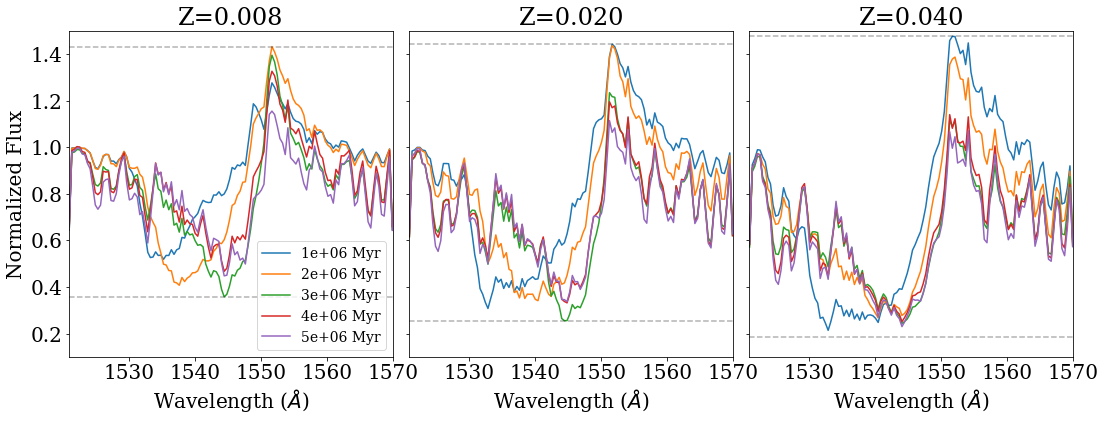

In [23]:
### LOAD LIBRARIES

# matplotlib is to visualize the data and results

import matplotlib.pyplot as plt

# %matplotlib inline is a magic function that renders the figure in a notebook 
# (instead of displaying a dump of the figure object).

%matplotlib inline

# numpy is to work with numerical arrays

import numpy as np

### LOAD DATA 
# .ifaspec1 files contain the high-resolution UV line spectrum from model atmospheres, 
# as opposed to using an empirical library. 
# The output format and units are the same as those under (13). 
# The library is discussed by Leitherer et al. (2010). 

path = '/Users/aidawofford/My/Investigacion/CLUES/Models/'

# Figure size and subplots
size=20
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : size}
plt.rc('font', **font)
fig, axes = plt.subplots(1,3,figsize=(18,6))
(ax1,ax2,ax3) = axes
plt.subplots_adjust(hspace=0.1)
plt.subplots_adjust(wspace=0.05)

x0=1550
xr=[x0-29,x0+20]
yr=[0.1,1.5]
# Definition for smoothing spectra

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

#Load data from a text file.
t0 = .1e5
ages = [1e6, 2e6, 3e6, 4e6, 5e6, 6e6, 7e6, 8e6, 9e6]
# Geneva High 1994 tracks
# Tracks and atmospheres match
metallicity=['Z=0.008','Z=0.020','Z=0.040']
model=['v94_z008_10Myr','v94_z020_10Myr','v94_z040_10Myr']

            
            
# Geneva 2013 tracks
# Tracks and atmospheres do not match

metallicity=['Z=0.008','Z=0.020','Z=0.040']
model=['v94_z008_10Myr','v94_z020_10Myr','v94_z040_10Myr']

lo=[]
hi=[]

imetal=0
data=np.loadtxt(path + model[imetal] + '/' + model[imetal] + '.ifaspec1', skiprows=6, delimiter="       ")
time, wave, logL, norm = np.transpose(data)
for iage in range(5):
    axes[imetal].set_title(metallicity[imetal])
    axes[imetal].set_xlim(xr[0],xr[1])
    axes[imetal].set_ylim(yr[0],yr[1]) 
    #axes[1][ipanel].set_xticklabels([])
    axes[imetal].set_xlabel('Wavelength ($\AA$)')
    if imetal > 0:              
        axes[imetal].set_yticklabels([]) 
    good_indices = np.where(time == ages[iage] + t0)
    x=wave[good_indices]
    y=norm[good_indices]
    good_indices = np.where(x >= xr[0])
    x=x[good_indices]
    y=y[good_indices]
    good_indices = np.where(x <= xr[1])
    x=x[good_indices]
    y=y[good_indices]    
    #print(imodel, ipanel)
    if iage <=4: axes[imetal].plot(x, smooth(y,3), label=str("{:.0e}".format(ages[iage]))+' Myr') # Legend
    if iage == 0: # Legend and y-axis label
        axes[imetal].set_ylabel('Normalized Flux')  
    lo.append(min(smooth(y,3)))
    hi.append(max(smooth(y,3)))
axes[imetal].axhline(min(lo),color='black',linestyle='--',alpha=0.3)  
axes[imetal].axhline(max(hi),color='black',linestyle='--',alpha=0.3)
axes[imetal].legend(fontsize='x-small',loc='lower right')

lo=[]
hi=[]

imetal=1
data=np.loadtxt(path + model[imetal] + '/' + model[imetal] + '.ifaspec1', skiprows=6, delimiter="       ")
time, wave, logL, norm = np.transpose(data)
for iage in range(5):
    axes[imetal].set_title(metallicity[imetal])
    axes[imetal].set_xlim(xr[0],xr[1])
    axes[imetal].set_ylim(yr[0],yr[1]) 
    #axes[1][ipanel].set_xticklabels([])
    axes[imetal].set_xlabel('Wavelength ($\AA$)')
    if imetal > 0:              
        axes[imetal].set_yticklabels([]) 
    good_indices = np.where(time == ages[iage] + t0)
    x=wave[good_indices]
    y=norm[good_indices]
    good_indices = np.where(x >= xr[0])
    x=x[good_indices]
    y=y[good_indices]
    good_indices = np.where(x <= xr[1])
    x=x[good_indices]
    y=y[good_indices]        
    #print(imodel, ipanel)
    if iage <=4: axes[imetal].plot(x, smooth(y,3)) # Legend
    lo.append(min(smooth(y,3)))
    hi.append(max(smooth(y,3)))
axes[imetal].axhline(min(lo),color='black',linestyle='--',alpha=0.3)  
axes[imetal].axhline(max(hi),color='black',linestyle='--',alpha=0.3)

lo=[]
hi=[]

imetal=2
data=np.loadtxt(path + model[imetal] + '/' + model[imetal] + '.ifaspec1', skiprows=6, delimiter="       ")
time, wave, logL, norm = np.transpose(data)
for iage in range(9):
    axes[imetal].set_title(metallicity[imetal])
    axes[imetal].set_xlim(xr[0],xr[1])
    axes[imetal].set_ylim(yr[0],yr[1]) 
    #axes[1][ipanel].set_xticklabels([])
    axes[imetal].set_xlabel('Wavelength ($\AA$)')
    if imetal > 0:              
        axes[imetal].set_yticklabels([]) 
    good_indices = np.where(time == ages[iage] + t0)
    x=wave[good_indices]
    y=norm[good_indices]
    good_indices = np.where(x >= xr[0])
    x=x[good_indices]
    y=y[good_indices]
    good_indices = np.where(x <= xr[1])
    x=x[good_indices]
    y=y[good_indices]    
    if iage <=4: axes[imetal].plot(x, smooth(y,3)) # Legend    
    lo.append(min(smooth(y,3)))
    hi.append(max(smooth(y,3)))
axes[imetal].axhline(min(lo),color='black',linestyle='--',alpha=0.3)  
axes[imetal].axhline(max(hi),color='black',linestyle='--',alpha=0.3)    
# Save plot
    #plt.savefig('plot.png', dpi=300, bbox_inches='tight')            
plt.show()            

#model=['v94_z020','v00_z014']
for imodel in range(3):    
    data=np.loadtxt(path + model[imodel] + '/' + model[imodel] + '.ifaspec1', skiprows=6, delimiter="       ")
    time, wave, logL, norm = np.transpose(data)
    for ipanel in range(4):
        axes[0][ipanel].set_title(str("{:.0e}".format(ages[ipanel]))+' Myr')
        axes[0][ipanel].set_xlim(xr[0],xr[1])
        axes[0][ipanel].set_ylim(0,2) 
        axes[0][ipanel].set_xticklabels([])
        if ipanel > 0:
            axes[0][ipanel].set_yticklabels([])   
        good_indices = np.where(time == ages[ipanel] + t0)
        x=wave[good_indices]
        y=norm[good_indices]
        #print(ipanel)
        #axes[0][ipanel].plot(x, y, label=solar[isolar])
        axes[0][ipanel].plot(x, smooth(y,3), label = metallicity[imodel]) 
        if ipanel == 0: 
            axes[0][ipanel].legend(fontsize='x-small',loc='upper left')
            axes[0][ipanel].set_ylabel('Normalized Flux')